In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.insert(1, "../src")
from pca import PCA
from knn import KNNClassifier

# Analisis de tope de K (KNN) y α (PCA)

## Busquemos un tope para α viendo cuanta varianza de los datos cubre

In [2]:
df = pd.read_csv("../data/train.csv")

pca_ = PCA(784)

In [3]:
pca_.fit(df)

In [4]:
var_ratio_by_component = pca_.explained_variance_ratio_

In [31]:
var_ratio_by_component

array([5.16446062e-02, 3.79315102e-02, 3.25576642e-02, 2.84966511e-02,
       2.59272817e-02, 2.27960963e-02, 1.73600340e-02, 1.53207951e-02,
       1.46575459e-02, 1.24430509e-02, 1.11210844e-02, 1.09074839e-02,
       9.01922862e-03, 8.96747497e-03, 8.37596070e-03, 7.85739875e-03,
       6.99101030e-03, 6.79519250e-03, 6.29325312e-03, 6.10668155e-03,
       5.67988774e-03, 5.37797442e-03, 5.11154523e-03, 4.83576222e-03,
       4.70223952e-03, 4.44333187e-03, 4.30078142e-03, 4.11827692e-03,
       3.92348491e-03, 3.63755966e-03, 3.48563231e-03, 3.38401473e-03,
       3.17511998e-03, 3.11974818e-03, 2.98954104e-03, 2.86575026e-03,
       2.69758225e-03, 2.58253634e-03, 2.51930831e-03, 2.47150045e-03,
       2.39949890e-03, 2.35731322e-03, 2.21569155e-03, 2.10577260e-03,
       2.03709572e-03, 1.98611972e-03, 1.91245676e-03, 1.84628164e-03,
       1.78253107e-03, 1.69909650e-03, 1.67117488e-03, 1.63768526e-03,
       1.55591158e-03, 1.51794073e-03, 1.48731315e-03, 1.42829272e-03,
      

Text(0, 0.5, 'Variance accumulation')

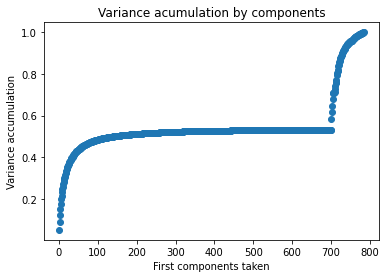

In [19]:
accumulated_by_component = np.cumsum(var_ratio_by_component)
components_amount = [i for i in range(1, len(accumulated_by_component) + 1)]
plt.scatter(components_amount, accumulated_by_component)
plt.title("Variance acumulation by components")
plt.xlabel("First components taken")
plt.ylabel("Variance accumulation")

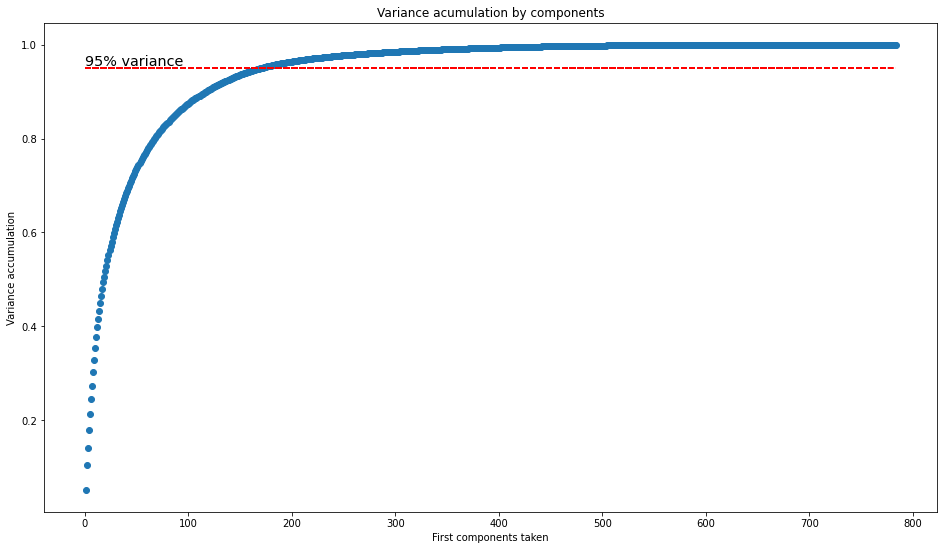

In [79]:
dup_var_ratio_by_component = var_ratio_by_component.copy()
dup_var_ratio_by_component[::-1].sort()
accumulated_by_component = np.cumsum(dup_var_ratio_by_component)
components_amount = [i for i in range(1, len(accumulated_by_component) + 1)]

plt.figure(figsize = (16,9))

plt.text(0, 0.95, '95% variance', va='bottom', fontsize='x-large')
plt.hlines([0.95 for i in range(1, len(accumulated_by_component) + 1)], 0, components_amount, linestyle="dashed", color='red')


# plt.vlines(170, 0, 0.95, linestyle="dashed", color='red')

plt.scatter(components_amount, accumulated_by_component)

plt.title("Variance acumulation by components")
plt.xlabel("First components taken")
plt.ylabel("Variance accumulation")

plt.savefig("variance_accumulation.png")

In [78]:
np.set_printoptions(threshold=sys.maxsize)
len(pca_.get_model().eigenvectors_)

785

# Busqueda de parámetros
La idea es buscar para dos pipelines cuales son sus mejores parámetros.
Por un lado vamos a tener KNN + PCA y por otro lado KNN solo.

In [ ]:
grid = {
    'k': [2,3,4,5,10,13,15,20,25,30,45,50,75,100],
    'alpha': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110]
}

pca_with_knn_pipe = Pipeline([
    ('pca', PCA()),
    ('knn', KNNClassifier()),
])

knn_cv = GridSearchCV(
    pca_with_knn_pipe,
    param_grid=grid,
    scoring=make_scorer(accuracy_score),
    n_jobs=-1,
    cv=10,
    verbose=3,
)

logger.info("Running GridSearch Cross-Validation for KNN")
logger.info("Using grid:")
logger.info(grid)

knn_cv.fit(X, y)

logger.info(knn_cv.best_estimator_)
logger.info(knn_cv.best_score_)
logger.info(knn_cv.best_params_)
logger.info(knn_cv.scorer_)